In [4]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import src.utility.gen_ts_synthetic as gen_syn
import os
import pandas as pd
import json

## Figure 5.1

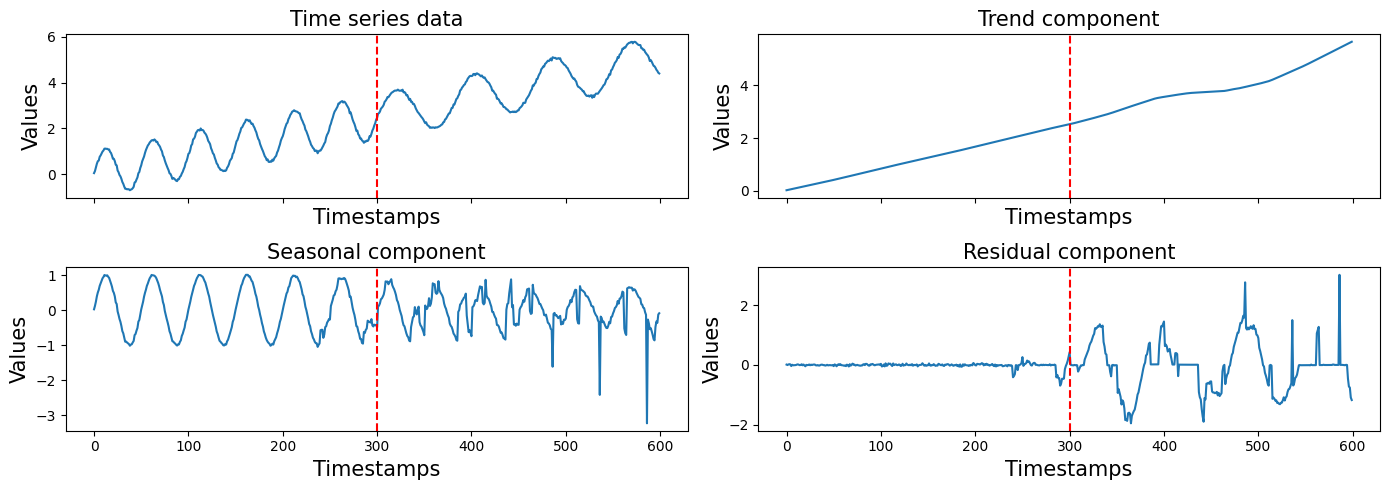

In [5]:
data = gen_syn.generate_syn1()

fig, axes = plt.subplots(2, 2, figsize=(14, 5), sharex=True)
axes = axes.flatten()
title = ['Time series data', 'Trend component', 'Seasonal component', 'Residual component']
axes[0].plot(data['ts'])
stl = STL(data['ts'], period=50, robust=True).fit()
axes[1].plot(stl.trend, label='trend')
axes[2].plot(stl.seasonal, label='seasonal')
axes[3].plot(stl.resid, label='residual')

# Set common x and y ticks
for i, ax in enumerate(axes):
    # ax.tick_params(axis='both', labelsize=18)
    ax.set_xlabel('Timestamps', fontsize=15)
    ax.axvline(x=300, color='r', linestyle='--')
    ax.set_ylabel('Values', fontsize=15)
    ax.set_title(title[i], size=15)
        
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Figure 5.2

DatetimeIndex(['1821-12-31', '1822-12-31', '1823-12-31', '1824-12-31',
               '1825-12-31', '1826-12-31', '1827-12-31', '1828-12-31',
               '1829-12-31', '1830-12-31',
               ...
               '1925-12-31', '1926-12-31', '1927-12-31', '1928-12-31',
               '1929-12-31', '1930-12-31', '1931-12-31', '1932-12-31',
               '1933-12-31', '1934-12-31'],
              dtype='datetime64[ns]', length=114, freq='YE-DEC')


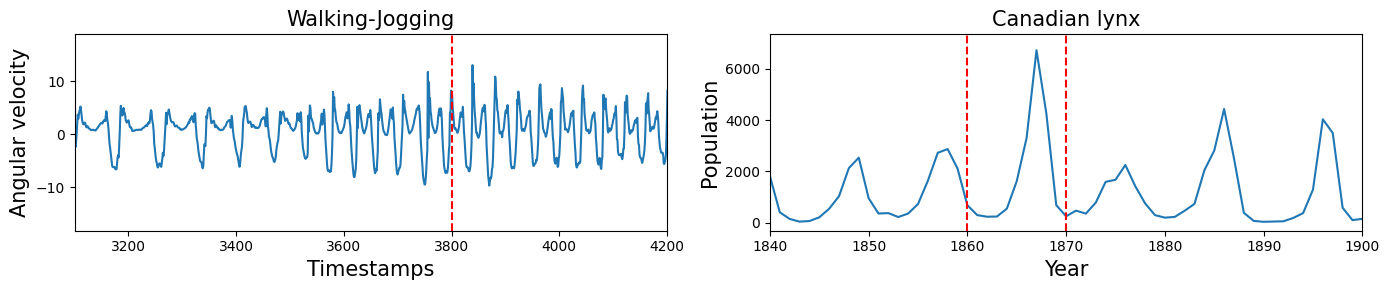

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 3))
walk_file = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/01_WalkJogRun1.json")
# Load JSON data
with open(walk_file, 'r') as file:
    json_data = json.load(file)
walk = json_data['ts']
axes[0].plot(walk)
axes[0].axvline(x=3800, color='r', linestyle='--')
axes[0].set_xlim([3100, 4200])

axes[0].set_title('Walking-Jogging', fontsize=15)
axes[0].set_xlabel('Timestamps', fontsize=15)
axes[0].set_ylabel('Angular velocity', fontsize=15)


# Load JSON data
file_name = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/04_fma_lynx.json")
with open(file_name, 'r') as file:
    json_data = json.load(file)

lynx = []
lynx = pd.Series(json_data['ts'])
start_date = '1821-01-01'
end_date = '1935-01-01'
date_sequence = pd.date_range(start=start_date, end=end_date, freq='YE')
print(date_sequence)
lynx_df = pd.DataFrame({'Date': date_sequence, 'Data': lynx})
axes[1].plot(lynx_df['Date'], lynx_df['Data'])
axes[1].set_xlim([pd.Timestamp('1840-01-01'), pd.Timestamp('1900-01-01')])
axes[1].axvline(x=pd.Timestamp('1860-01-01'), color='r', linestyle='--')
axes[1].axvline(x=pd.Timestamp('1870-01-01'), color='r', linestyle='--')
axes[1].set_title('Canadian lynx', fontsize=15)
axes[1].set_xlabel('Year', fontsize=15)
axes[1].set_ylabel('Population', fontsize=15)

plt.tight_layout()
plt.show()